In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

In [ ]:
from imutils import paths
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import imageio
import cv2
import os
import pickle
import math
import time

import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import models
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, LSTM
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

In [ ]:
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping

In [ ]:
# restore extracted features
!cp /content/gdrive/MyDrive/train_features.tar.gz /content
!cp /content/gdrive/MyDrive/test_features.tar.gz /content
!cp /content/gdrive/MyDrive/class_name_list.pickle /content

In [ ]:
!tar xf train_features.tar.gz
!tar xf test_features.tar.gz

In [ ]:
with open('train_data.pickle', 'rb') as f:
  train_data = pickle.load(f)

with open('train_labels.pickle', 'rb') as f:
  train_labels = pickle.load(f)

with open('test_data.pickle', 'rb') as f:
  test_data = pickle.load(f)

with open('test_labels.pickle', 'rb') as f:
  test_labels = pickle.load(f)

with open('class_name_list.pickle', 'rb') as f:
  class_name_list = pickle.load(f)

In [ ]:
print(f"Frame features in train set: {train_data[0].shape}")
print(f"Frame masks in train set: {train_data[1].shape}")

Frame features in train set: (9537, 20, 1280)
Frame masks in train set: (9537, 20)


In [ ]:
print(f"Frame features in test set: {test_data[0].shape}")

Frame features in test set: (3783, 20, 1280)


In [ ]:
train_features = np.copy(train_data[0])
train_features_rs = train_features.reshape((train_features.shape[0]*train_features.shape[1]), train_features.shape[2])

test_features = np.copy(test_data[0])
test_features_rs = test_features.reshape((test_features.shape[0]*test_features.shape[1]), test_features.shape[2])

In [ ]:
# min-max normalization
min_max_scaler = preprocessing.MinMaxScaler()
train_features_rs = min_max_scaler.fit_transform(train_features_rs)
test_features_rs = min_max_scaler.transform(test_features_rs)

In [ ]:
train_features = train_features_rs.reshape(train_features.shape[0], train_features.shape[1], train_features.shape[2])
test_features = test_features_rs.reshape(test_features.shape[0], test_features.shape[1], test_features.shape[2])

In [ ]:
# check if normalization was successfull: False implies success
print(np.array_equal(train_data[0], train_features))
print(np.array_equal(test_data[0], test_features))

False
False


In [ ]:
# Load model
# !cp /content/gdrive/MyDrive/hypermodel_4.h5 /content
model = models.load_model("hypermodel_2.h5")

In [ ]:
# Output accuracy on test set
_, accuracy = model.evaluate([test_features, test_data[1]], test_labels)
print(f"Test accuracy: {round(accuracy * 100, 2)}%")

119/119 [==============================] - 41s 304ms/step - loss: 2.9742 - accuracy: 0.5694
Test accuracy: 56.94%


In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 20, 1280)]   0           []                               
                                                                                                  
 input_8 (InputLayer)           [(None, 20)]         0           []                               
                                                                                                  
 lstm_9 (LSTM)                  (None, 20, 480)      3381120     ['input_7[0][0]',                
                                                                  'input_8[0][0]']                
                                                                                                  
 lstm_10 (LSTM)                 (None, 20, 640)      2869760     ['lstm_9[0][0]']           

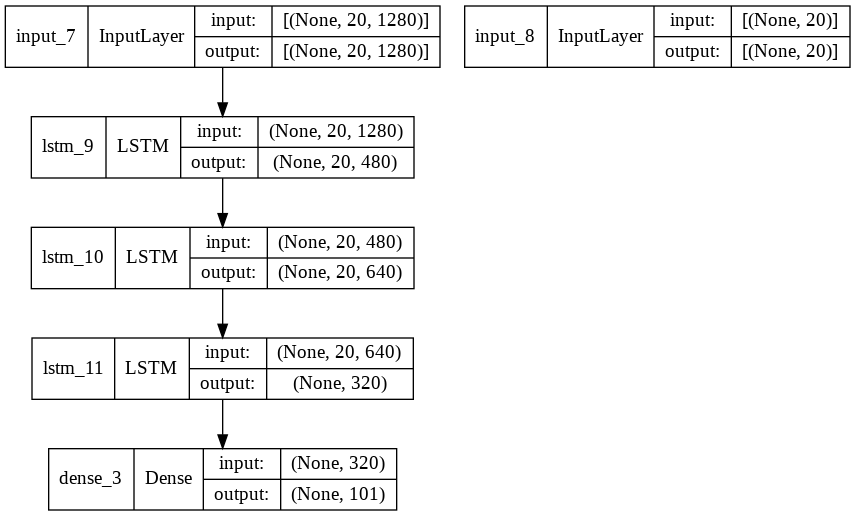

In [ ]:
dot_img_file = '/tmp/best_model.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

### Conclusion: above model performs better than all the tested models.
Filename: hypermodel_2.h5 